<a href="https://colab.research.google.com/github/Ms-Shaukat/DataAnalyticsProjectsandPortfolio/blob/main/DA_Green_Assignment2_Munazza_Shaukat_munazza_guide_gmail_com.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **Part 1** 
### **1.1 Data Loading**
Task 1: Load the dataset food order.csv into a pandas DataFrame.

In [1]:
#Uploading csv file into Colab
from google.colab import files
uploaded = files.upload()

Saving food_order.csv to food_order.csv


In [2]:
import pandas as pds
# Load the CSV dataset into a pandas DataFrame
dfs = pds.read_csv("food_order.csv")

Task 2: Display the first 10 rows of your dataset

In [3]:
# Display the first 10 rows of the dataset
print(dfs.head(10))

   order_id  customer_id            restaurant_name   cuisine_type  \
0   1477147       337525                    Hangawi         Korean   
1   1477685       358141  Blue Ribbon Sushi Izakaya       Japanese   
2   1477070        66393                Cafe Habana        Mexican   
3   1477334       106968  Blue Ribbon Fried Chicken       American   
4   1478249        76942           Dirty Bird to Go       American   
5   1477224       147468           Tamarind TriBeCa         Indian   
6   1477894       157711          The Meatball Shop        Italian   
7   1477859        89574                  Barbounia  Mediterranean   
8   1477174       121706         Anjappar Chettinad         Indian   
9   1477311        39705              Bukhara Grill         Indian   

   cost_of_the_order day_of_the_week     rating  food_preparation_time  \
0              30.75         Weekend  Not given                     25   
1              12.08         Weekend  Not given                     25   
2      

### **1.2 Data Description**
Task 3: Identify the data types for each feature

In [4]:
# Identifying the data types
data_types = dfs.dtypes
print("Data Types:")
print(data_types)

Data Types:
order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
dtype: object


Task 4: Write a function that calculates the *null rate* for each column.

In [13]:
# Declaring funtions for Identifying Null
def calculate_null_rate(var_dfs1):
    null_count = var_dfs1.isnull().sum()
    null_rate = null_count / len(var_dfs1) * 100
    return null_rate

#Call function
null_rate = calculate_null_rate(dfs)
print("Null Rate:")
print(null_rate)


Null Rate:
order_id                 0.0
customer_id              0.0
restaurant_name          0.0
cuisine_type             0.0
cost_of_the_order        0.0
day_of_the_week          0.0
rating                   0.0
food_preparation_time    0.0
delivery_time            0.0
dtype: float64


Task 5: Identify the number of unique values for each column.

In [8]:
# unique values for each column
unique_values = dfs.nunique()
print("Number of Unique Values:")
print(unique_values)

Number of Unique Values:
order_id                 1898
customer_id              1200
restaurant_name           178
cuisine_type               14
cost_of_the_order         312
day_of_the_week             2
rating                      4
food_preparation_time      16
delivery_time              19
dtype: int64


### **1.3 Data Manipulation**
Task 6: Add one column, total time

In [ ]:
# Calculate total time, both columns (food_preparation_time,delivery_time) are in minutes hence the derived total column is in minutes
dfs['total_time_minutes'] = dfs['food_preparation_time'] + dfs['delivery_time'] 
print(dfs.head(10))

### **1.4 Satistics**
Task 7: Identify the different cusine types.

In [15]:
# There are two ways to identify cuisine type: method 1 is returning first whole row sortby Cuisine type, so I comment Method 1
#gj= dfs.groupby('cuisine_type')
#print(gj.first())

# method 2 displays Only cuisine type column

cuisine_types = dfs['cuisine_type'].unique()
print("Different cuisine types")
print(cuisine_types)

Different cuisine types
['Korean' 'Japanese' 'Mexican' 'American' 'Indian' 'Italian'
 'Mediterranean' 'Chinese' 'Middle Eastern' 'Thai' 'Southern' 'French'
 'Spanish' 'Vietnamese']


Task 8: Find the number of restaurants per cuisine type.

In [16]:
restaurantCount = dfs.groupby('cuisine_type')["restaurant_name"].count()
print("No. of restaurants per cuisine type")
print(restaurantCount)

No. of restaurants per cuisine type
cuisine_type
American          584
Chinese           215
French             18
Indian             73
Italian           298
Japanese          470
Korean             13
Mediterranean      46
Mexican            77
Middle Eastern     49
Southern           17
Spanish            12
Thai               19
Vietnamese          7
Name: restaurant_name, dtype: int64


### **1.5 Visualization**
### Task 9:

(a) Using your results from Task 8, and using a pie chart display the count of restaurants per cuisine type.

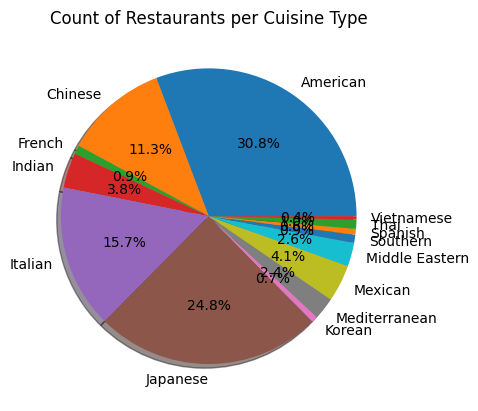

In [19]:
import matplotlib.pyplot as plt

plt.pie(restaurantCount, labels=restaurantCount.index, autopct='%1.1f%%',shadow=True)
plt.title("Count of Restaurants per Cuisine Type")
plt.show()

(b) Show only the 5 cuisine types with most restaurants.

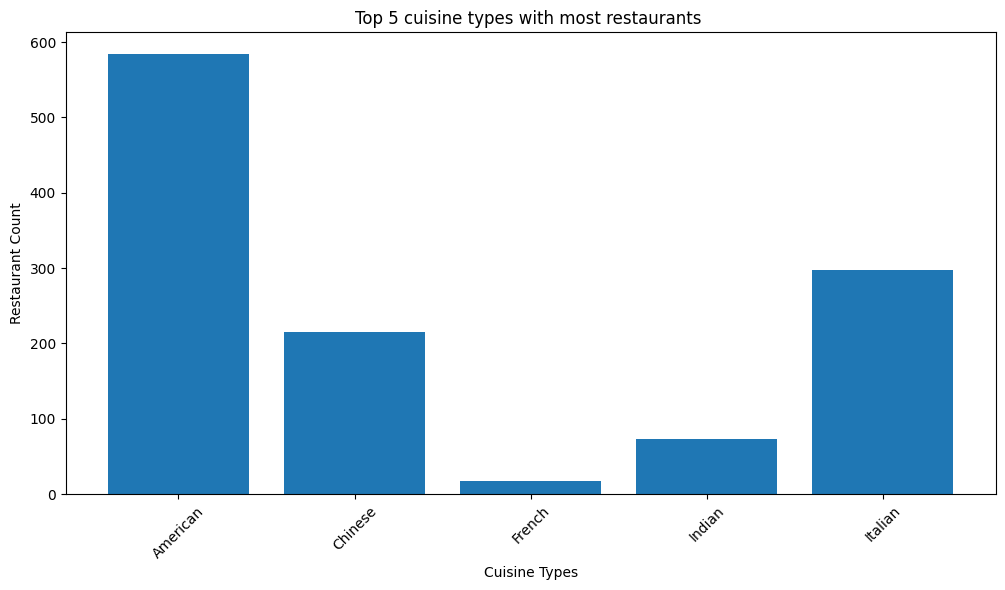

In [20]:
# Show only the top 5 cuisine types with most restaurants by displaying graph

restaurant_name_counts = restaurantCount.head(5)
plt.figure(figsize=(12, 6))


plt.bar(restaurant_name_counts.index, restaurant_name_counts.values)
plt.title("Top 5 cuisine types with most restaurants ") 
plt.xlabel("Cuisine Types")
plt.ylabel("Restaurant Count")
plt.xticks(rotation=45)

plt.show()

### Task 10:
(a) Plot a graph that shows the 10 most popular restaurant name.

(b) Highlight the top 3.

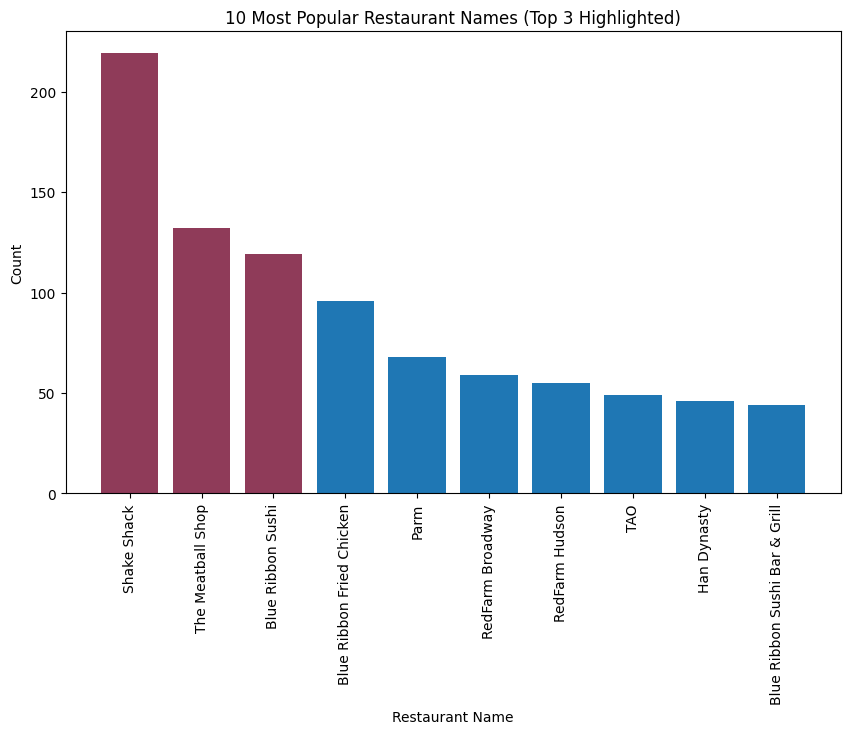

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
#list top 10 restaurants
popular_restaurants = dfs['restaurant_name'].value_counts().head(10)
plt.bar(popular_restaurants.index, popular_restaurants.values)

plt.xlabel("Restaurant Name")
plt.ylabel("Count")
plt.title("10 Most Popular Restaurant Names (Top 3 Highlighted)")
plt.xticks(rotation=90)
#highlight top 3 only
plt.bar(popular_restaurants.index[:3], popular_restaurants.values[:3], color='r', alpha=0.5)
plt.show()